In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [2]:
data80 = pd.read_csv('../Datasets/churn-bigml-80.csv')
data20 = pd.read_csv('../Datasets/churn-bigml-20.csv')
data80.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [3]:
#Data20 => 668 lineas
#Data80 => 2667 lineas
dataTotal = data80.append(data20)
#dataTotal.head(5)
dataTotal.describe(include ='all')

C:\Users\User\AppData\Local\Temp\ipykernel_7744\1634111106.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataTotal = data80.append(data20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [88]:
#Pregunta 1-A
#Para hallar la variable con mayor dispersion utilizaremos el coeficiente de variacion
def CoeficienteVariacion(nombre,std,mean):
    rpta = std/mean
    print(nombre,'=>',rpta)

CoeficienteVariacion("Account Length",dataTotal['Account length'].std(),dataTotal['Account length'].mean())
CoeficienteVariacion("Area code",dataTotal['Area code'].std(),dataTotal['Area code'].mean())
CoeficienteVariacion("Number vmail messages",dataTotal['Number vmail messages'].std(),dataTotal['Number vmail messages'].mean())
print('-----------------------------------------')
CoeficienteVariacion("Total day minutes",dataTotal['Total day minutes'].std(),dataTotal['Total day minutes'].mean())
CoeficienteVariacion("Total day calls",dataTotal['Total day calls'].std(),dataTotal['Total day calls'].mean())
CoeficienteVariacion("Total day charge",dataTotal['Total day charge'].std(),dataTotal['Total day charge'].mean())
print('-----------------------------------------')
CoeficienteVariacion("Total eve minutes",dataTotal['Total eve minutes'].std(),dataTotal['Total eve minutes'].mean())
CoeficienteVariacion("Total eve calls",dataTotal['Total eve calls'].std(),dataTotal['Total eve calls'].mean())
CoeficienteVariacion("Total eve charge",dataTotal['Total eve charge'].std(),dataTotal['Total eve charge'].mean())
print('-----------------------------------------')
CoeficienteVariacion("Total night minutes",dataTotal['Total night minutes'].std(),dataTotal['Total night minutes'].mean())
CoeficienteVariacion("Total night calls",dataTotal['Total night calls'].std(),dataTotal['Total night calls'].mean())
CoeficienteVariacion("Total night charge",dataTotal['Total night charge'].std(),dataTotal['Total night charge'].mean())
print('-----------------------------------------')
CoeficienteVariacion("Total intl minutes",dataTotal['Total intl minutes'].std(),dataTotal['Total intl minutes'].mean())
CoeficienteVariacion("Total intl calls",dataTotal['Total intl calls'].std(),dataTotal['Total intl calls'].mean())
CoeficienteVariacion("Total intl charge",dataTotal['Total intl charge'].std(),dataTotal['Total intl charge'].mean())
print('-----------------------------------------')
CoeficienteVariacion("Customer service calls",dataTotal['Customer service calls'].std(),dataTotal['Customer service calls'].mean())

# Analizando los coeficientes de variacion de los datos podemos observar que el numero de mensaje vmail es el que cuenta con
# mayor dispercion, esto se debe a que el numero de mensajes que se envia puede ser cero o muchos por lo que los datos cuentan
# con mucha dispercion

Account Length => 0.3940254507509569
Area code => 0.09691901759454756
Number vmail messages => 1.6901282427578512
-----------------------------------------
Total day minutes => 0.30297516150376136
Total day calls => 0.1998203376318401
Total day charge => 0.30296909470965466
-----------------------------------------
Total eve minutes => 0.2523323544898525
Total eve calls => 0.19899877459223728
Total eve charge => 0.25232870668357055
-----------------------------------------
Total night minutes => 0.2517714646482489
Total night calls => 0.19547554524353683
Total night charge => 0.2517746462989786
-----------------------------------------
Total intl minutes => 0.27271265455615945
Total intl calls => 0.5494458917434769
Total intl charge => 0.27265342840308154
-----------------------------------------
Customer service calls => 0.841722336828564


In [31]:
dataTotal['Total day charge'].describe()
#RPTA -> La variable Total night minutes cuenta con la mayor dispersión entre sus datos, esto sucede por la cantidad de
#        minutos que los usuarios pasan y como la cantidad entre el valor minimo y máximo es tan grande.

count    3333.000000
mean       30.562307
std         9.259435
min         0.000000
25%        24.430000
50%        30.500000
75%        36.790000
max        59.640000
Name: Total day charge, dtype: float64

In [110]:
#Pregunta 1-B

def CoeficienteAsimetria(nombre,column):
    rpta = ss.skew(column)
    offset = 0.05
    simetria = ''
    
    if rpta <= -offset:
        simetria = 'Asimetria Negativa'
    elif rpta >= offset:
        simetria = 'Asimetria Positiva'
    else:
        simetria = 'Simetrica'
    
    print(nombre,'=>',rpta,"\t",simetria)

CoeficienteAsimetria("Account Length",dataTotal['Account length'])
CoeficienteAsimetria("Area code",dataTotal['Area code'])
CoeficienteAsimetria("Number vmail messages",dataTotal['Number vmail messages'])
print('-----------------------------------------')
CoeficienteAsimetria("Total day minutes",dataTotal['Total day minutes'])
CoeficienteAsimetria("Total day calls",dataTotal['Total day calls'])
CoeficienteAsimetria("Total day charge",dataTotal['Total day charge'])
print('-----------------------------------------')
CoeficienteAsimetria("Total eve minutes",dataTotal['Total eve minutes'])
CoeficienteAsimetria("Total eve calls",dataTotal['Total eve calls'])
CoeficienteAsimetria("Total eve charge",dataTotal['Total eve charge'])
print('-----------------------------------------')
CoeficienteAsimetria("Total night minutes",dataTotal['Total night minutes'])
CoeficienteAsimetria("Total night calls",dataTotal['Total night calls'])
CoeficienteAsimetria("Total night charge",dataTotal['Total night charge'])
print('-----------------------------------------')
CoeficienteAsimetria("Total intl minutes",dataTotal['Total intl minutes'])
CoeficienteAsimetria("Total intl calls",dataTotal['Total intl calls'])
CoeficienteAsimetria("Total intl charge",dataTotal['Total intl charge'])
print('-----------------------------------------')
CoeficienteAsimetria("Customer service calls",dataTotal['Customer service calls'])

# Se utilizo un offset para la interpretación del coeficiente de asimetria debido a que los resultados no salian exactamente 0
# de esta forma podemos detectar que de 16 variables analizadas 7 cuentan con una simetria entre -0.05 y 0.05. 
# Las variables simetricas siempre son el total de minutos y costo de las llamadas mientras que en la noche se presenta simetria
# en el numero de llamadas.

Account Length => 0.09656281161489656 	 Asimetria Positiva
Area code => 1.1263157243742088 	 Asimetria Positiva
Number vmail messages => 1.2642543349768245 	 Asimetria Positiva
-----------------------------------------
Total day minutes => -0.029063979518122906 	 Simetrica
Total day calls => -0.11173632373075192 	 Asimetria Negativa
Total day charge => -0.029070177927036592 	 Simetrica
-----------------------------------------
Total eve minutes => -0.023866708804637513 	 Simetrica
Total eve calls => -0.05553813000161921 	 Asimetria Negativa
Total eve charge => -0.023847250496276968 	 Simetrica
-----------------------------------------
Total night minutes => 0.008917275580987904 	 Simetrica
Total night calls => 0.032484942054044584 	 Simetrica
Total night charge => 0.0088822370626944 	 Simetrica
-----------------------------------------
Total intl minutes => -0.2450256034866406 	 Asimetria Negativa
Total intl calls => 1.3208833668164015 	 Asimetria Positiva
Total intl charge => -0.24517

In [33]:
#Pregunta 1-C
dataTotal.corr()
#Analizando los datos podemos obtener que las variables con mayor correlación entre si son:
    #Total day minutes <-> Total day charge
    #Total eve minutes <-> Total eve charge
    #Total night minutes <-> Total night charge
    #Total intl minutes <-> Total intl charge
#Esto se debe a que la cantidad de dinero que se aplica a las llamadas esta vinculada a la duración en minutos de la misma

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


In [34]:
#Pregunta 1-D
dataTotal.corr(method = "spearman")
#Aplicando el metodo spearman podemos apreciar que las correlaciones se mantienen


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.017439,0.003077,0.017884,0.032690,0.017884,-0.007954,0.018378,-0.007950,-0.013643,-0.007669,-0.013654,0.014761,0.027453,0.014761,-0.005942,0.015583
Area code,-0.017439,1.000000,0.010228,0.008327,-0.004061,0.008327,0.005023,-0.005238,0.005035,0.008652,0.024707,0.008635,0.003164,-0.005177,0.003164,0.031850,0.003257
Number vmail messages,0.003077,0.010228,1.000000,0.004006,-0.012396,0.004006,0.021162,-0.007148,0.021177,0.005053,0.010975,0.005036,-0.001565,0.006248,-0.001565,-0.019639,-0.095358
Total day minutes,0.017884,0.008327,0.004006,1.000000,0.009391,1.000000,0.006405,0.017867,0.006391,-0.005699,0.023052,-0.005730,-0.016110,-0.000291,-0.016110,-0.015032,0.170677
Total day calls,0.032690,-0.004061,-0.012396,0.009391,1.000000,0.009391,-0.014062,0.013807,-0.014063,0.018890,-0.017848,0.018857,0.015139,0.004148,0.015139,-0.020957,0.026311
Total day charge,0.017884,0.008327,0.004006,1.000000,0.009391,1.000000,0.006405,0.017867,0.006391,-0.005699,0.023052,-0.005730,-0.016110,-0.000291,-0.016110,-0.015032,0.170677
Total eve minutes,-0.007954,0.005023,0.021162,0.006405,-0.014062,0.006405,1.000000,-0.010455,1.000000,-0.013211,0.003399,-0.013220,-0.003225,0.014281,-0.003225,-0.017805,0.088592
Total eve calls,0.018378,-0.005238,-0.007148,0.017867,0.013807,0.017867,-0.010455,1.000000,-0.010446,0.004870,0.005639,0.004892,0.000213,0.014862,0.000213,0.002697,0.008578
Total eve charge,-0.007950,0.005035,0.021177,0.006391,-0.014063,0.006391,1.000000,-0.010446,1.000000,-0.013216,0.003388,-0.013225,-0.003231,0.014289,-0.003231,-0.017800,0.088580
Total night minutes,-0.013643,0.008652,0.005053,-0.005699,0.018890,-0.005699,-0.013211,0.004870,-0.013216,1.000000,0.008580,0.999999,-0.010331,0.000485,-0.010331,-0.012713,0.034343


In [35]:
#Pregunta 1-E
ss.spearmanr(dataTotal['Total day minutes'],dataTotal['Total day charge'])

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [36]:
ss.spearmanr(dataTotal['Total eve minutes'],dataTotal['Total eve charge'])

SpearmanrResult(correlation=0.9999997739419472, pvalue=0.0)

In [37]:
ss.spearmanr(dataTotal['Total night minutes'],dataTotal['Total night charge'])

SpearmanrResult(correlation=0.999998791196482, pvalue=0.0)

In [38]:
ss.spearmanr(dataTotal['Total intl minutes'],dataTotal['Total intl charge'])

SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)

In [39]:
#Luego de aplicar la prueba spearman a las variables con mayor correlación podemos rechazar la hipotesis nula debido a que
# el Pvalue es menor a 5%

<AxesSubplot:xlabel='Churn', ylabel='Total day charge'>

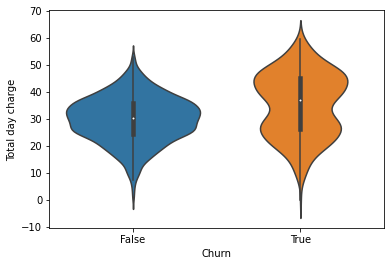

In [40]:
#Pregunta 1-F
sns.violinplot(x='Churn',y='Total day charge',data=dataTotal)

<AxesSubplot:xlabel='Churn', ylabel='Total eve charge'>

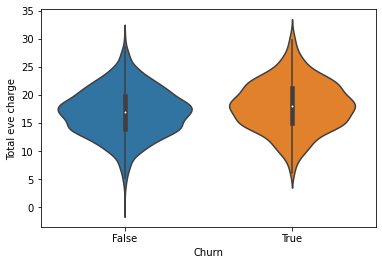

In [41]:
sns.violinplot(x='Churn',y='Total eve charge',data=dataTotal)

<AxesSubplot:xlabel='Churn', ylabel='Total night charge'>

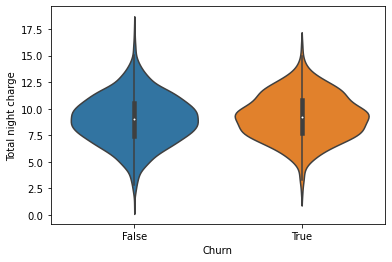

In [42]:
sns.violinplot(x='Churn',y='Total night charge',data=dataTotal)

<AxesSubplot:xlabel='Churn', ylabel='Total intl charge'>

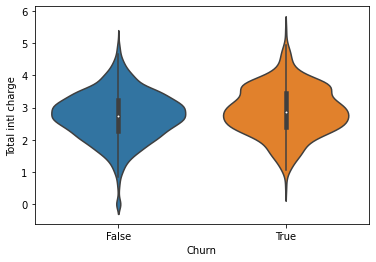

In [43]:
sns.violinplot(x='Churn',y='Total intl charge',data=dataTotal)

In [44]:
#Para la mayoria de variables podemos apreciar que las medias se encuentran en rangos similares al ser evaluadas respecto a la
#Variable Churn para determinar si el cliente cancelo o no. 
#Adicionalmente podemos apreciar que para la variable Total day charge presenta una distribución bimodal

In [45]:
#Pregunta 2-A
#5,8,11,14
X_train = data80.iloc[:,[8,11,14,17]].values
y_train = data80.iloc[:,-1].values
X_test = data20.iloc[:,[8,11,14,17]].values
y_test = data20.iloc[:,-1].values

X_train[0:5]

array([[45.07, 16.78, 11.01,  2.7 ],
       [27.47, 16.62, 11.45,  3.7 ],
       [41.38, 10.3 ,  7.32,  3.29],
       [50.9 ,  5.26,  8.86,  1.78],
       [28.34, 12.61,  8.41,  2.73]])

In [46]:
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=5)
print(cv_scores)

[0.87078652 0.88180113 0.87992495 0.87992495 0.86491557]


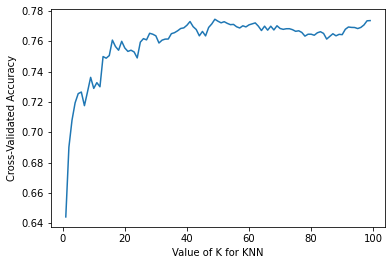

Best K	= 49
AUC	= 0.773767022451233


In [108]:
k_range = range(1, 100)
k_scores = []
best_K = 0
current_auc = 0
roc_auc_KNN = 0

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_KNN = knn.predict(X_test)
    y_pred_prob_KNN = knn.predict_proba(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_KNN[:,1])
    roc_auc_KNN = auc(false_positive_rate, true_positive_rate)
    k_scores.append(roc_auc_KNN)
    
    if roc_auc_KNN > current_auc:
        current_auc = roc_auc_KNN
        best_K = k

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print("Best K\t= " + str(best_K))
print("AUC\t=",roc_auc_KNN)

In [111]:
classifier = KNeighborsClassifier(n_neighbors=49).fit(X_train, y_train)
y_pred = classifier.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[559,  13],
       [ 64,  31]], dtype=int64)

Confusion matrix, without normalization
[[559  13]
 [ 64  31]]
Normalized confusion matrix
[[0.97727273 0.02272727]
 [0.67368421 0.32631579]]


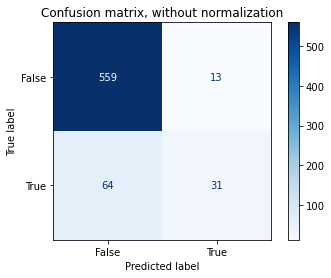

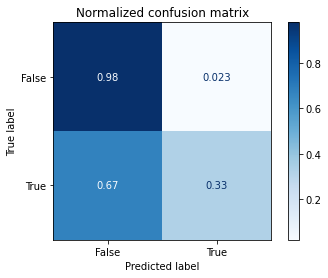

In [112]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

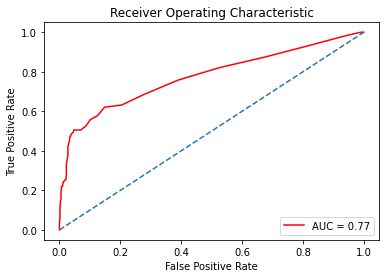

In [113]:
y_pred_prob = classifier.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
# Luego de aplicar el Cross Validation Score podemos determinar el mejor K=49 para la funcion, si bien nuestro modelo predice
# mejor los clientes que no cancelan su servicio (los que cuentan con falso en la variable Churn) el modelo predictivo 
# presenta un AUC de 77% lo cual sobrepasa la linea intermedia

In [54]:
X_train_DT = data80.iloc[:,[8,11,14,17]].values
y_train_DT = data80.iloc[:,-1].values
X_test_DT = data20.iloc[:,[8,11,14,17]].values
y_test_DT = data20.iloc[:,-1].values

In [55]:
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid = GridSearchCV(tree.DecisionTreeClassifier(),param_grid,refit=True,verbose=2,cv=5)
grid.fit(X_train_DT,y_train_DT)
classifier_DT = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=5).fit(X_train_DT, y_train_DT)
y_pred_DT = classifier_DT.predict(X_test_DT)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.4s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=10 ................
[CV] . criterion=gini, max_depth=2, min_samples_leaf=10, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=10 ................
[CV] . criterion=gini, max_depth=2, min_samples_leaf=10, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=10 ................
[CV] .

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] . criterion=gini, max_depth=5, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=50 ................
[CV] . criterion=gini, max_depth=5, min_samples_leaf=50, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=50 ................
[CV] . criterion=gini, max_depth=5, min_samples_leaf=50, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=50 ................
[CV] . criterion=gini, max_depth=5, min_samples_leaf=50, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=50 ................
[CV] . criterion=gini, max_depth=5, min_samples_leaf=50, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=50 ................
[CV] . criterion=gini, max_depth=5, min_samples_leaf=50, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=100 ...............
[CV]  criterion=gini, max_depth=5, min_samples_leaf=100, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=100 ...............
[CV]  

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=5 ..............
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=5 ..............
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=5 ..............
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=10 .............
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=10, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=10 .............
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=10, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=10 .............
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=10, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=10 ..........

[CV]  criterion=entropy, max_depth=20, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=5 .............
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=5 .............
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=5 .............
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=5 .............
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=10 ............
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=10, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=10 ............
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=10, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=10 ...

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.4s finished


In [56]:
y_pred_prob_DT = classifier_DT.predict_proba(X_test_DT)
false_positive_rate_DT, true_positive_rate_DT, thresholds_DT = roc_curve(y_test_DT, y_pred_prob_DT[:,1])
roc_auc_DT = auc(false_positive_rate_DT, true_positive_rate_DT)

In [57]:
X_train_NB = data80.iloc[:,[8,11,14,17]].values
y_train_NB = data80.iloc[:,-1].values
X_test_NB = data20.iloc[:,[8,11,14,17]].values
y_test_NB = data20.iloc[:,-1].values

In [58]:
classifier_G = GaussianNB().fit(X_train_NB, y_train_NB)
y_pred_prob_NB = classifier_G.predict_proba(X_test_NB)
false_positive_rate_NB, true_positive_rate_NB, thresholds = roc_curve(y_test_NB, y_pred_prob_NB[:,1])
roc_auc_NB = auc(false_positive_rate_NB, true_positive_rate_NB)
roc_auc_NB

0.7046926757453074

In [59]:
X_train_RN = data80.iloc[:,[8,11,14,17]].values
y_train_RN = data80.iloc[:,-1].values
X_test_RN = data20.iloc[:,[8,11,14,17]].values
y_test_RN = data20.iloc[:,-1].values

In [60]:
classifier_RN = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=500, alpha=0.0001,
                     solver='adam', random_state=21,tol=0.000000001)

In [61]:
param_grid = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [62]:
grid = GridSearchCV(MLPClassifier(max_iter=500),param_grid,refit=True,verbose=2,cv=5)
grid.fit(X_train_RN,y_train_RN)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solve

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   2.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   1.9s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.8s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.5s
[CV] activation=tanh, alpha=0.0001, hidd

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   3.8s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   1.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   0.9s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total

[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   3.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   3.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   1.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   2.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   4.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   2.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   2.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   1.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solve

[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   2.5s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   1.5s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   3.8s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   2.6s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   1.

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  3.4min finished


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [63]:
classifier_RN = MLPClassifier(hidden_layer_sizes=(10,30,10),max_iter=500,alpha=0.05).fit(X_train_RN, y_train_RN)
y_pred_RN = classifier_RN.predict(X_test_RN)
y_pred_prob_RN = classifier_RN.predict_proba(X_test_RN)
false_positive_rate_RN, true_positive_rate_RN, thresholds_RN = roc_curve(y_test_RN, y_pred_prob_RN[:,1])
roc_auc_RN = auc(false_positive_rate_RN, true_positive_rate_RN)
roc_auc_RN

0.7131762973868238

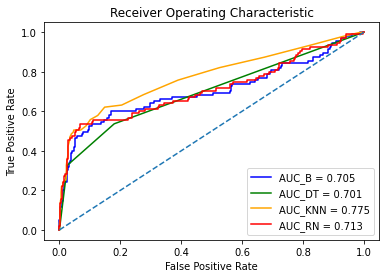

In [114]:
plt.title('Receiver Operating Characteristic')

plt.plot(false_positive_rate_NB,true_positive_rate_NB, color='blue',label = 'AUC_B = %0.3f' % roc_auc_NB)

plt.plot(false_positive_rate_DT,true_positive_rate_DT, color='green',label = 'AUC_DT = %0.3f' % roc_auc_DT)

plt.plot(false_positive_rate,true_positive_rate, color='orange',label = 'AUC_KNN = %0.3f' % roc_auc)

plt.plot(false_positive_rate_RN,true_positive_rate_RN, color='red',label = 'AUC_RN = %0.3f' % roc_auc_RN)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],linestyle='--')

plt.axis('tight')

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

In [ ]:
#Luego de analizar los 4 modelos podemos concluir que el model KNN es el mejor entre los modelos aprendidos.